### detecting edges:




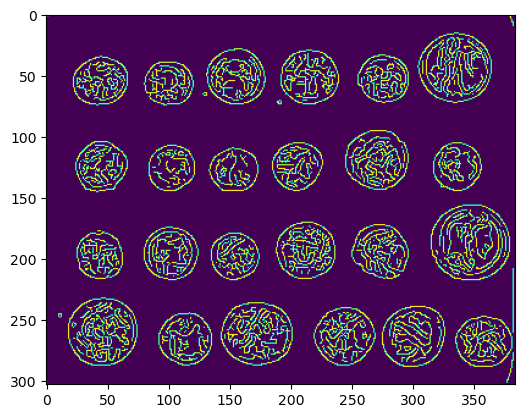

In [8]:
from skimage.feature import canny
from skimage import data , color
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

coins = data.coins()
#convert image to grayscale


canny_edges= canny(coins)
plt.imshow(canny_edges)


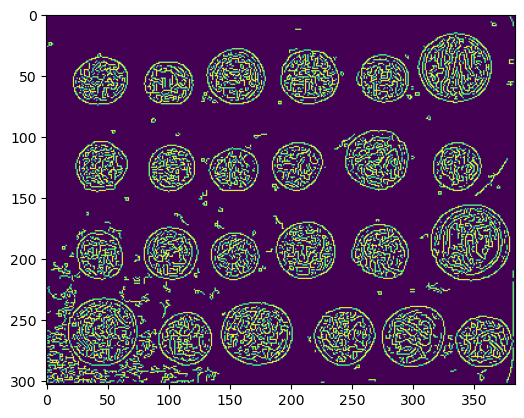

In [10]:
#apply canny detector with a sigma of 0.5
canny_edges_0_5 = canny(coins , sigma=0.5)

#show resulting images with edges 

plt.imshow(canny_edges_0_5)



### harris corner detector


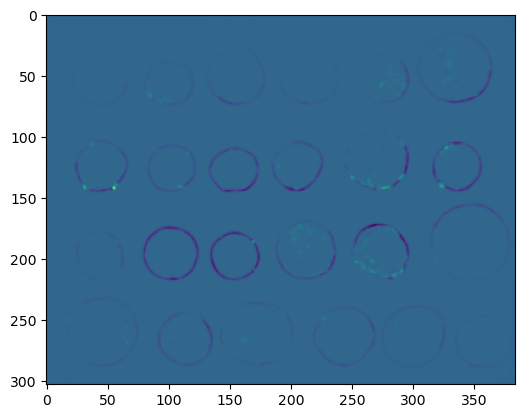

In [12]:
### right around the corner
# Apply the detector  to measure the possible corners
from skimage.feature import corner_harris
#for grays
measure_image = corner_harris(coins)

plt.imshow(measure_image)


A total of 477 corners were detected


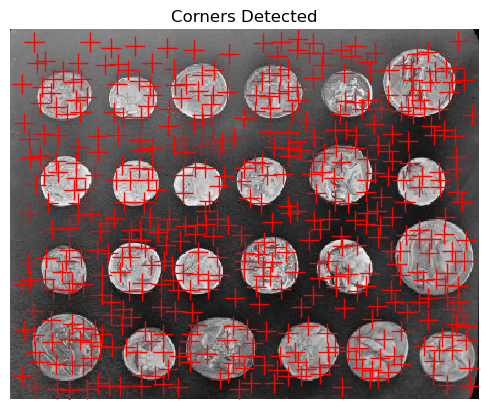

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import corner_harris, corner_peaks
from skimage import data, color

# Find the peaks of the corners using the Harris detector
# Load the 'coins' image from scikit-image's sample data
image = data.coins()

# If the image is not grayscale, convert it to grayscale
if len(image.shape) == 3:  # Check if the image is RGB (3 channels)
    image = color.rgb2gray(image)

# Detect corners using Harris corner detection
coords = corner_peaks(corner_harris(image), min_distance=5)

# Print the number of detected corners
print('A total of', len(coords), 'corners were detected')

# Function to display the image with detected corners
def show_image_with_detected_corners(image, coords, title='Corners Detected'):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)  # Plot the corners
    plt.axis('off')  # Hide the axes
    plt.show()

# Display the image with the detected corners
show_image_with_detected_corners(image, coords)


### face detection

filters/
auto focus/
recommendations/
blur for privacy protection/
to recognize emotions later on /

In [4]:
from skimage.feature import Cascade

#load the trained file from the module root
trained_file = data.lbp_frontal_face_cascade_filename()

#initialize the detector cascade 
detector = Cascade(trained_file)

#apply detector on the image

detected = detector.detect_multi_scale(img=image , scale_factor =1.2)